# Part I - Exploratory Data Analysis on the PISA2012 Dataset
## by Mohammed Aljudaibi

## Introduction
The Program for International Student Assessment, PISA 2012, assessed the competencies of 15-year-olds students in reading, mathematics and science all around the world. This document will explore the PISA2012 dataset to find insights on the students and the participating countries.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#File can be downloaded from https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip
import zipfile
with zipfile.ZipFile("pisa2012.csv.zip","r") as zip_ref:
    zip_ref.extractall()

In [3]:
df = pd.read_csv("pisa2012.csv", encoding='latin-1', index_col=0, low_memory=False)

In [4]:
print(df.shape[0], "Rows and ", df.shape[1], "Columns")

485490 Rows and  635 Columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Columns: 635 entries, CNT to VER_STU
dtypes: float64(250), int64(17), object(368)
memory usage: 2.3+ GB


In [6]:
df.dtypes

CNT            object
SUBNATIO        int64
STRATUM        object
OECD           object
NC             object
               ...   
W_FSTR80      float64
WVARSTRR        int64
VAR_UNIT        int64
SENWGT_STU    float64
VER_STU        object
Length: 635, dtype: object

In [7]:
df.sample(10)

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
26547,Australia,360000,AUS0308,OECD,Australia,239,4396,10,2.0,3,...,15.3865,47.8744,47.8744,15.3865,47.8744,47.8744,70,1,0.1255,22NOV13
443426,Slovenia,7050000,SVN0201,OECD,Slovenia,331,5742,11,1.0,1,...,8.7264,2.8314,2.9130,8.3313,8.7078,8.3266,37,2,0.3112,22NOV13
109202,Chile,1520000,CHL0106,OECD,Chile,66,1959,11,4.0,5,...,57.7087,19.0454,57.7087,19.0454,57.7087,57.7087,17,2,0.1673,22NOV13
245089,Italy,3800000,ITA0501,OECD,Italy,179,4499,10,1.0,1,...,2.2576,6.8663,6.6836,6.7590,6.5913,2.2518,50,2,0.0086,22NOV13
79317,Canada,1240000,CAN0542,OECD,Canada,194,4847,10,2.0,9,...,1.9265,5.8888,2.0563,2.1177,1.9983,2.1568,35,2,0.0119,22NOV13
420496,Russian Federation,6430000,RUS9797,Non-OECD,Russian Federation,124,2951,9,1.0,4,...,82.0927,82.0927,246.2781,82.0927,246.2781,82.0927,14,2,0.1398,22NOV13
2919,Albania,80000,ALB0011,Non-OECD,Albania,130,2919,10,1.0,2,...,2.7934,8.1699,8.1929,8.1929,8.1929,2.7934,28,1,0.1300,22NOV13
316951,Mexico,4840000,MEX3294,OECD,Mexico,53,1248,10,7.0,5,...,11.2392,3.7464,3.7464,11.2392,11.2392,11.2392,1,2,0.0057,22NOV13
1610,Albania,80000,ALB0009,Non-OECD,Albania,71,1610,10,2.0,11,...,6.6355,6.6355,6.6355,6.6355,19.9066,19.9066,7,2,0.3125,22NOV13
61167,Brazil,760000,BRA2263,Non-OECD,Brazil,265,5901,9,1.0,8,...,10.5539,10.4897,3.7048,3.4657,3.4592,3.7239,44,1,0.0030,22NOV13


In [8]:
df.isna().sum()

CNT           0
SUBNATIO      0
STRATUM       0
OECD          0
NC            0
             ..
W_FSTR80      0
WVARSTRR      0
VAR_UNIT      0
SENWGT_STU    0
VER_STU       0
Length: 635, dtype: int64

In [9]:
df["CNT"].nunique() #number of unique countries

68

In [10]:
df["CNT"].unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

There are cities and states counted here independently of their country such as the city of `Perm(Russian Federation)` for Russia and the state of `Florida (USA)` for the USA. `Macao-China` and `Hong Kong-China` are autonomous states, but are not yet independent of China, for the sake of this analysis I will consider them a part of China.

In [11]:
#change state/city to country, also rename some countries
df["CNT"].replace({
    'Massachusetts (USA)': 'United States of America',
    'Connecticut (USA)': 'United States of America',
    'Florida (USA)': 'United States of America',
    'China-Shanghai': 'China',
    'Chinese Taipei': 'China',
    'Czech Republic': 'China',
    'Hong Kong-China': 'China',
    'Macao-China': 'China',
    'Perm(Russian Federation)': 'Russia',
    'Russian Federation': 'Russia',
    'Korea': 'South Korea',
    'Slovak Republic': 'Slovakia'
}, inplace = True)

In [12]:
df["CNT"].nunique()

60

After some cleaning, this shows that there are 60 countries in the dataset

### Geopandas for Map Plots

In [13]:
#importing geopandas to perform map plots
import geopandas as gpd
#reading countries dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#removing Antartica from the map to make it look neater
world = world[world.name != 'Antarctica']
#renaming Czechia to match the PISA dataset
world["name"].replace({'Czechia': 'Czech Republic'}, inplace = True)

In [14]:
#checking which countries from the PISA dataset are not in the world dataset
set(df["CNT"].unique()) - set(world["name"].unique())

{'Liechtenstein', 'Singapore'}

Liechtenstein and Singapore are missing from the dataset because their size is very small and would not show up on the visualisation of the map. Singapore is 728 square kilometers and Liechtenstein is only 158 squared kilometers.

### What is the structure of your dataset?

The PISA2012 dataset has 485,490 different students with data on them such as their country and their scores for a total of 635 features.

### What is/are the main feature(s) of interest in your dataset?

I am interested in seeing which countries performed the best, and also what factors affect a students scores.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The `PV1MATH` mathematics scores, `PV1READ` reading scores, and `PV1SCIE` science scores columns will be used for the scores.

## Univariate Exploration



### What are the distributions and mean of the students scores in Maths, Science and Reading?

In [15]:
def subjectHist(series, subject, colors):
    """
    Plots a histogram with titles and a mean line

    Parameters: 
            series: Pandas series
            subject: String with name of subject
            colors: color list, 0th color for bar color, 1st color for mean line
    """
    #hist plot
    plt.hist(series, bins = 25, color=colors[0])
    #mean line with text
    plt.axvline(series.mean(), linestyle="dashed", color=colors[1])
    min_ylim, max_ylim = plt.ylim()
    plt.text(series.mean()*1.1, max_ylim*0.9, 'Mean: {:.1f}'.format(series.mean()))
    #titles and labels
    plt.title(f"Distribution of {subject} Scores")
    plt.xlabel(f"{subject} Score")
    plt.ylabel("Number of Students")

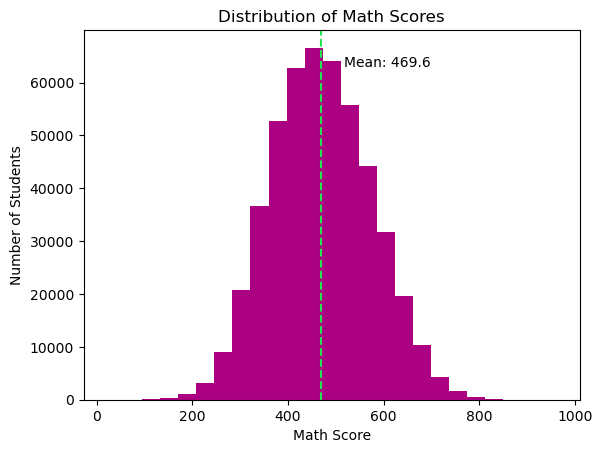

In [16]:
#histogram for Math scores
subjectHist(df["PV1MATH"], "Math", ["#AA0081","#23E452"])

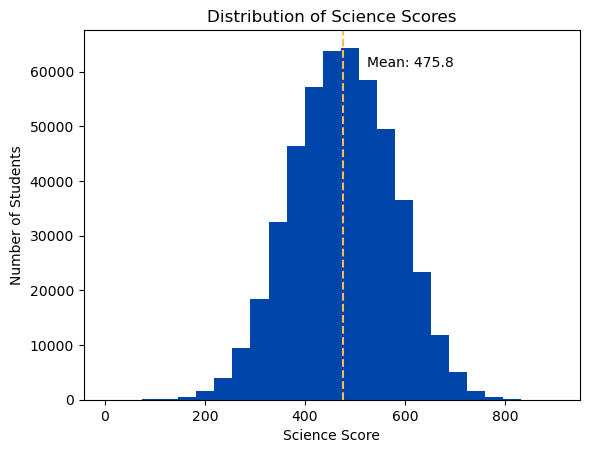

In [17]:
#histogram for Science scores
subjectHist(df["PV1SCIE"], "Science", ["#0046AA","#FFB955"])

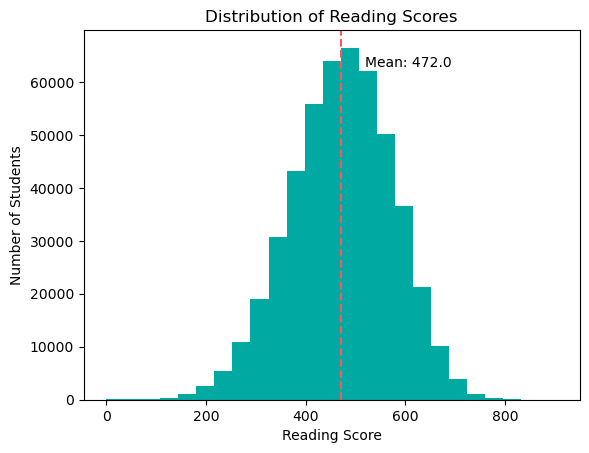

In [18]:
#histogram for Reading scores
subjectHist(df["PV1READ"], "Reading", ["#00AAA3", "#FF555C"])

All three plots show a normal distribution with the majority of the scores close to the mean. The science score had the highest mean of 475.8, followed by the reading score with a mean of 472, and finally math with the lowest mean of the three subjects at 469.6

### What is the proportion of the students genders?

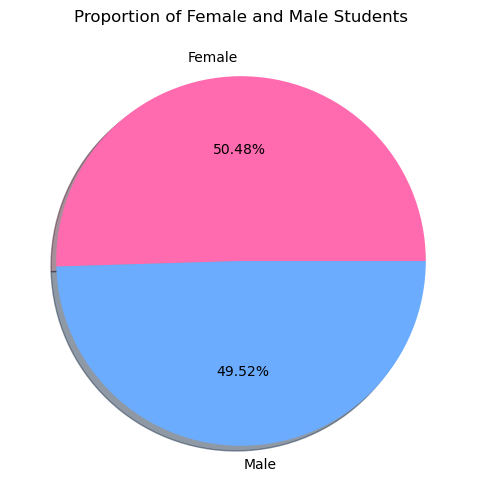

In [19]:
gender = df["ST04Q01"].value_counts()
gender.plot(kind="pie", figsize=(6,6), autopct='%1.2f%%', shadow=True, colors=["#FF6BAE", "#6BACFF"], ylabel='')
plt.title("Proportion of Female and Male Students");

This shows that the dataset had an almost equal amount of female and male students, with very slightly more female students at 50.48% of all test takers

### What does a visualisation of the countries that participated look like?

In [20]:
#list of countries in the PISA dataset
countries = df["CNT"].unique()
#for the countries in the world dataset, if the country is in the pisa dataset, give it 1.0 in a new column name plt, else nan
for i in range(len(world)):
    if i == 159: #Error handling :>
        continue #159th country is Antartica and it was removed
    #if the country is in df
    if world.loc[i, "name"] in countries:
        world.loc[i, "plt"] = 1
    else:
        world.loc[i, "plt"] = np.nan

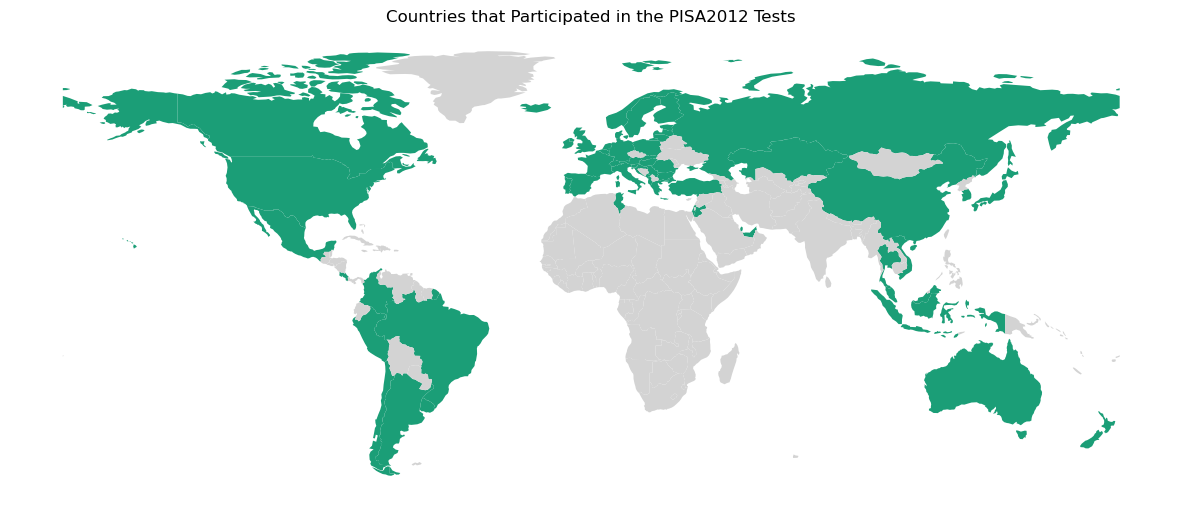

In [21]:
world.plot(column="plt", 
           figsize=(15, 10), 
           missing_kwds={'color': 'lightgrey'},
           cmap="Dark2")
plt.title("Countries that Participated in the PISA2012 Tests")
plt.axis("off");

This shows that the majority of the countries that didnt participate are located in Africa, the Middle East and South Asia.

### How are the countries that partook in the PISA2012 split in terms of OECD?

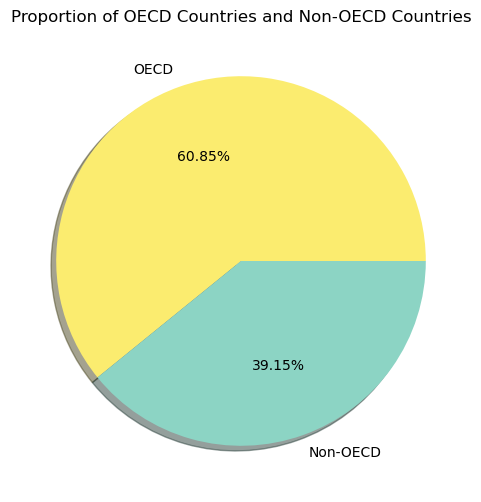

In [22]:
OECD = df["OECD"].value_counts()
OECD.plot(kind="pie", figsize=(6,6), autopct='%1.2f%%', shadow=True, colors=["#fbec6f", "#8cd4c4"], ylabel='');
plt.title("Proportion of OECD Countries and Non-OECD Countries");

The majority of participating countries are part of OECD

### Which countries are a part of the Organization for Economic Co-operation and Development (OECD)?

In [23]:
for i in range(len(world)+1):
    if i == 159:
        continue 
    if world.loc[i, "name"] in countries:
        #get location of the first instance of the country in df and get its OECD value
        location = df["CNT"].values.searchsorted(world.loc[i, "name"], side='right')
        oecd = df.loc[location, "OECD"]
        #give value for OECD in world
        if oecd == "OECD":
            world.loc[i, "OECD"] = "OECD"
        else:
            world.loc[i, "OECD"] = "Non-OECD"
    else:
        world.loc[i, "OECD"] = np.nan

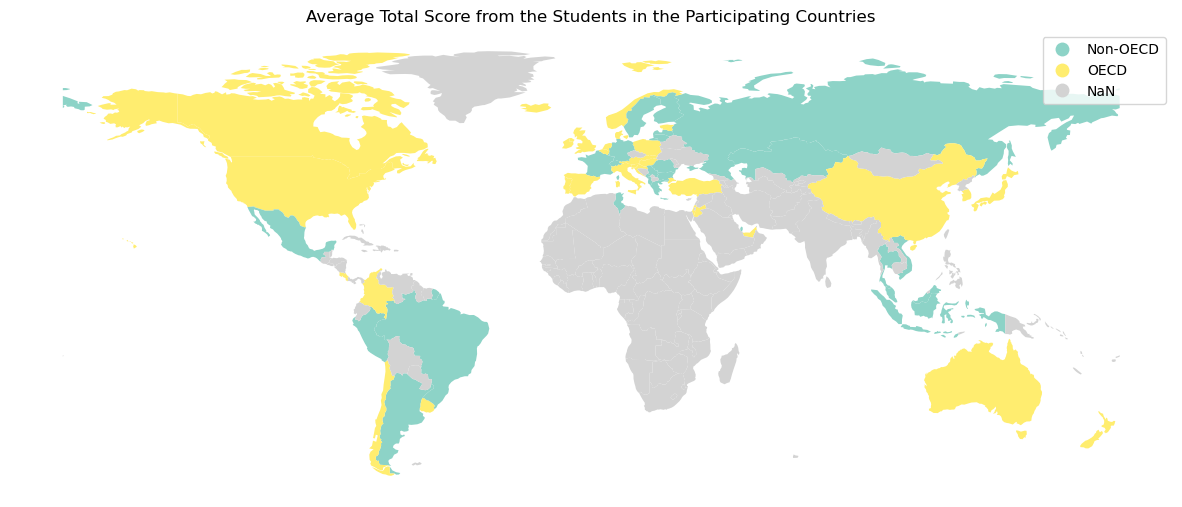

In [24]:
world.plot(column="OECD", 
           figsize=(15, 10), 
           missing_kwds={'color': 'lightgrey'}, 
           legend=True,
           cmap="Set3");
plt.title("Average Total Score from the Students in the Participating Countries")
plt.axis("off");

### How did the countries around the world perform in the PISA tests?

In [25]:
#make new column in df for the combined score for all three tests
df["combined_score"] = df["PV1MATH"] + df["PV1SCIE"] + df["PV1READ"]

In [26]:
#combine math, science, and reading scores in a new column
df["combined_score"] = df["PV1MATH"] + df["PV1SCIE"] + df["PV1READ"]
#group countries by their mean combined score
mean_scores = df.groupby("CNT").mean()["combined_score"]
mean_scores.to_dict
#for the pisa participating countries in world, store the average combined_score
for i in range(len(world)):
    if i == 159:
        continue 
    if world.loc[i, "name"] in countries:
        world.loc[i, "combined_score"] = mean_scores[world.loc[i ,"name"]]
    else:
        world.loc[i, "combined_score"] = np.nan

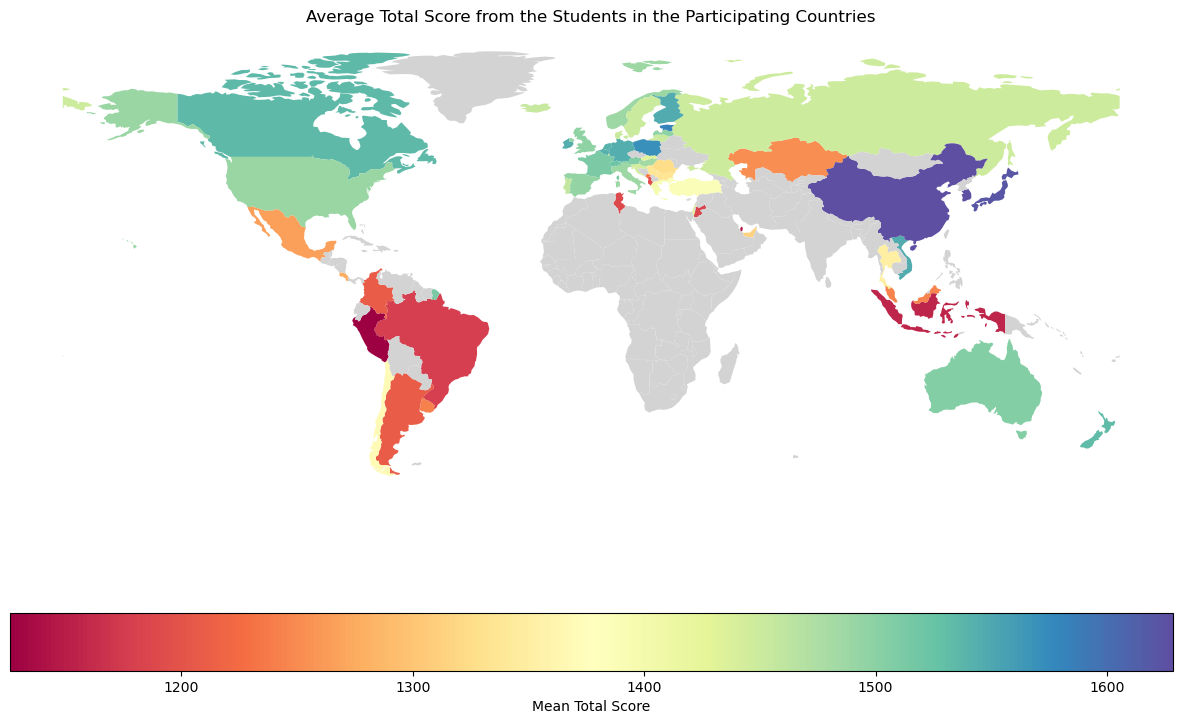

In [27]:
world.plot(column="combined_score", 
           figsize=(15, 10), 
           missing_kwds={'color': 'lightgrey'}, 
           legend=True,
           cmap="Spectral",
           legend_kwds={'label': 'Mean Total Score',
                       'orientation': 'horizontal'});
plt.title("Average Total Score from the Students in the Participating Countries")
plt.axis("off");

East Asian countries scored high compared to the rest of the country, and South American countries scored lower than the rest of the countries

### What is the average total score for every country?

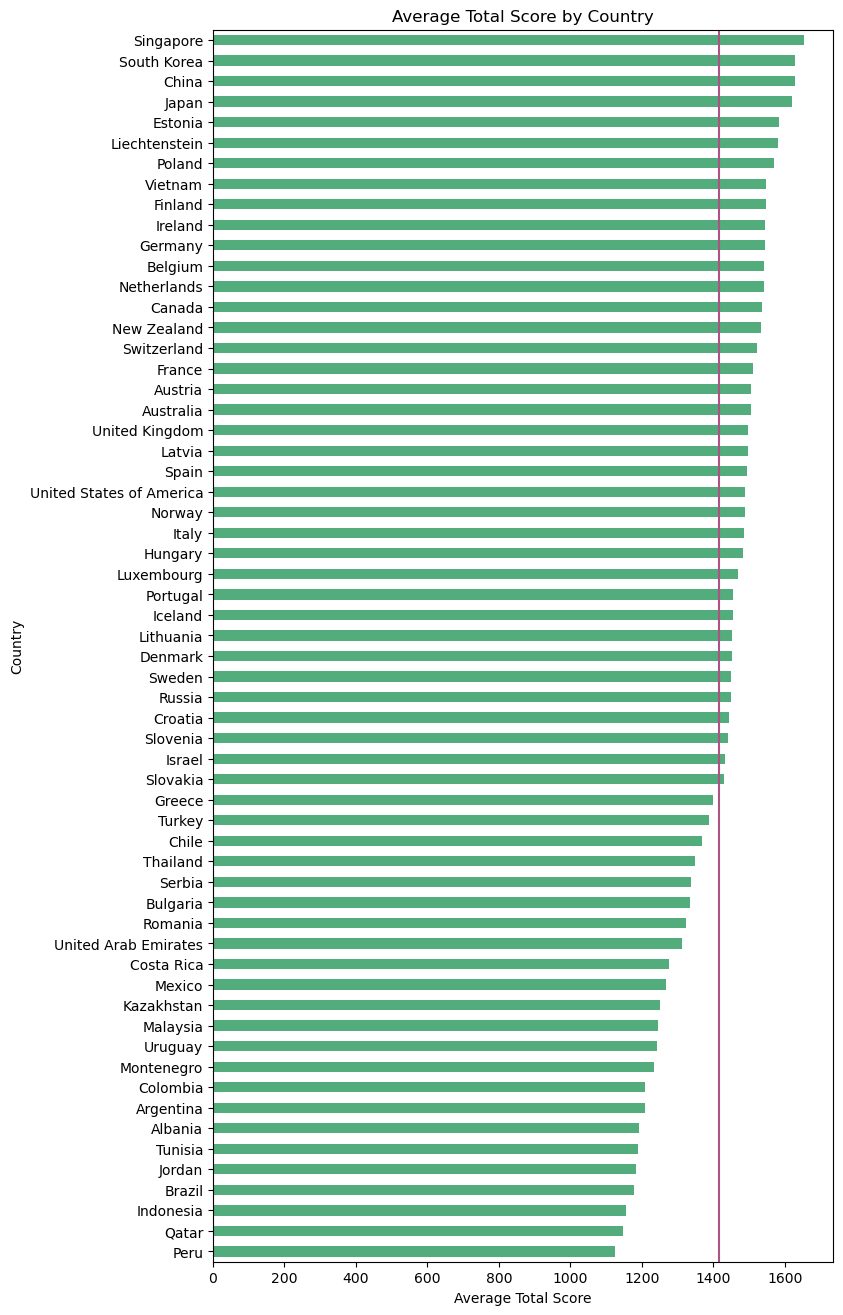

In [28]:
#plotting mean total score with horizontal bar plot
mean_scores.rename_axis("Country").sort_values().plot.barh(figsize=(8,16), color="#53AC7B")
#mean line
plt.axvline(mean_scores.mean(), color="#AC5384");
#title and label
plt.title("Average Total Score by Country")
plt.xlabel("Average Total Score");

This also shows the ranking of the countries, where the east Asian countries, Singapore, South Korea, China and Japan scored the highest among all the countries.

I was also surprised that Liechtenstein scored so highly. As mentioned previously Liechtenstein is a very small, and on the year of the tests, the country only had a population of 36,000.

### How many students in the participating countries took the PISA tests

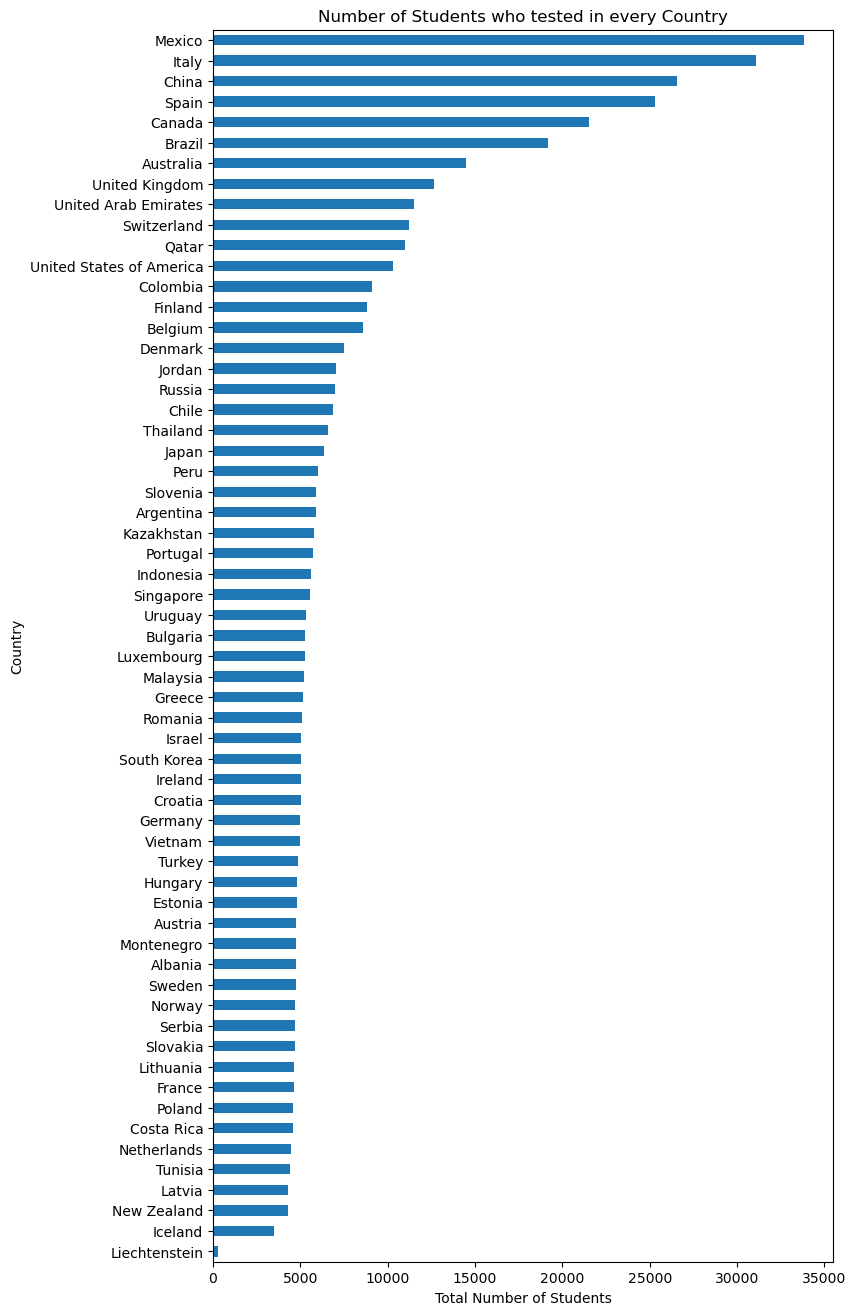

In [29]:
df["CNT"].value_counts().sort_values(ascending=True).plot.barh(figsize=(8,16))
plt.ylabel("Country")
plt.xlabel("Total Number of Students")
plt.title("Number of Students who tested in every Country");

The three countries with the most amount of students who partook in PISA are, Mexico, Italy and China. On the other hand, Liechtenstein had very few students who partook in the test compared to the rest of the world, in fact, Mexico almost had as many students who partook in PISA as the entire population of Liechtenstein.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The students are pretty much split evenly by gender.

It was intersting to see the top four performing countries were all very close to each other in Asia. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I had to perform some data manipulation to be able to be able to make the world maps.

## Bivariate Exploration

### How did female and male students score in the tests?

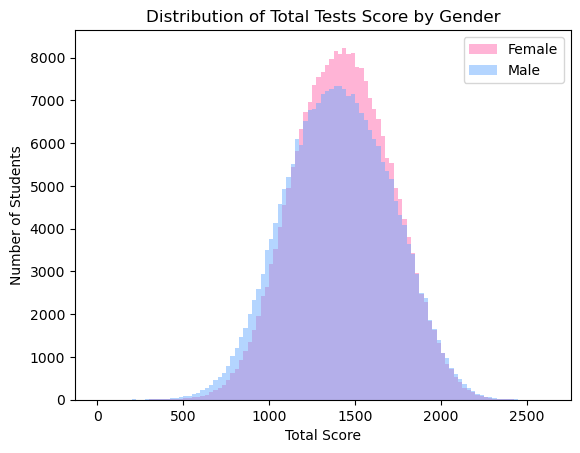

In [30]:
#dividing males and females into their own structure
males = df[df["ST04Q01"]=="Male"]
females = df[df["ST04Q01"]=="Female"]
#bin size for plotting
binsize = 25
bins = np.arange(0, df["combined_score"].max(), binsize)
#plotting two hists over each other, one for female and the other for male
plt.hist(data=females, x="combined_score", bins=bins, label="Female", alpha=0.5, color="#FF6BAE")
plt.hist(data=males, x="combined_score", bins=bins, label="Male", alpha=0.5, color="#6BACFF")
#legend and x,y labels
plt.title("Distribution of Total Tests Score by Gender")
plt.legend()
plt.xlabel("Total Score")
plt.ylabel("Number of Students");

In [31]:
def subplotsHist(x, subject, title):
    """
    1d histogram subplot

    Parameters:-
        x: x in axes as int
        subject: subject name in the dataframe as String
        title: subject name as String
    """
    binsize = 15
    bins = np.arange(0, df[subject].max(), binsize)

    axes[x].hist(data=females, x=subject, bins=bins, label="Female", alpha=0.5, color="#FF6BAE")
    axes[x].hist(data=males, x=subject, bins=bins, label="Male", alpha=0.5, color="#6BACFF")
    axes[x].set_xlabel(f"{title} Score")

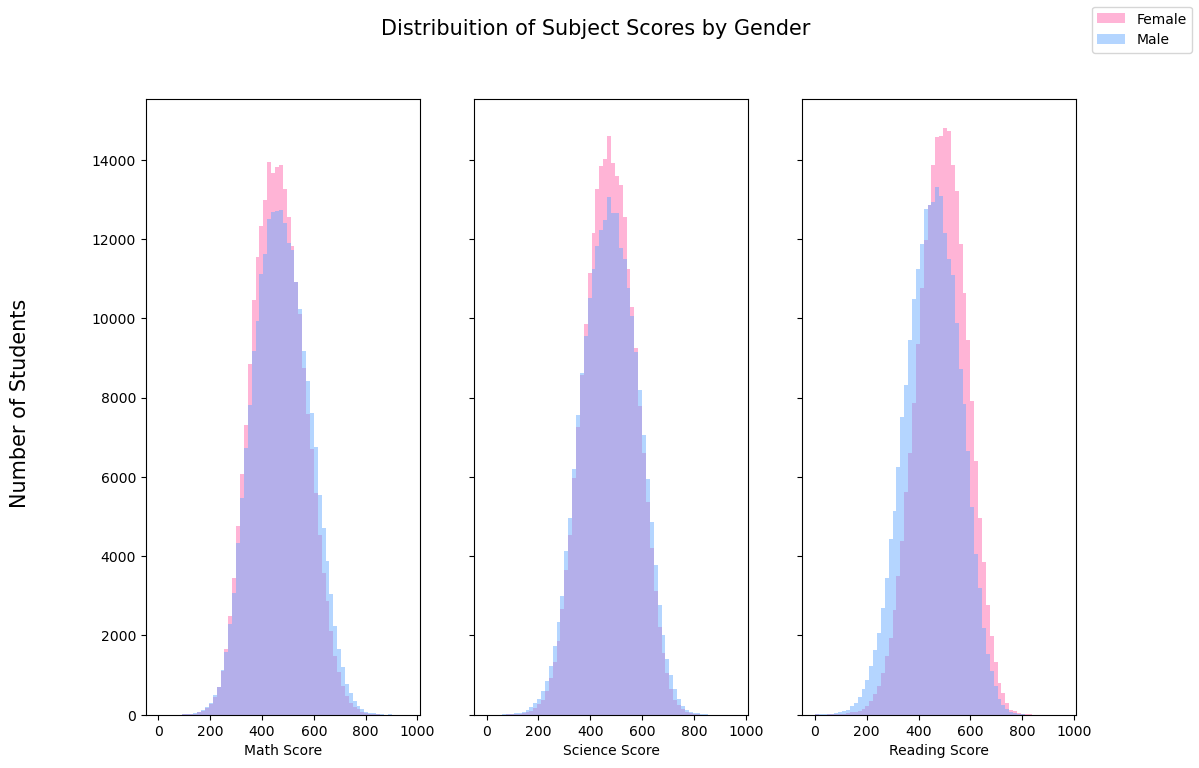

In [32]:
#making subplot of size 1x3
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True)
#making subplots for the 3 subjects
subplotsHist(0, "PV1MATH", "Math")
subplotsHist(1, "PV1SCIE", "Science")
subplotsHist(2, "PV1READ", "Reading")
#adding 
fig.text(0.02, 0.5, 'Number of Students', ha='center', va='center', rotation='vertical', size=15)
fig.set_size_inches(12,8)
plt.figlegend(["Female", "Male"])
fig.suptitle("Distribuition of Subject Scores by Gender", size=15);

These subplots show the following findings:
1. All distributions for both males and females in all subjects are normally distributed
1. Female students show higher peaks in all three subjects, meaning that more female students score closer to the average than male students
1. The first subplot shows that the male students on scored just a bit better than the female students on the math tests
1. The second subplot shows that the female and male students performed equally on the science tests
1. The third subplot shows that the female students performed better than the male students on the reading tests

Finding the exact differences between the female and male students scores:

In [33]:
print("Difference in Math Scores between female and male students: ",int(females["PV1MATH"].mean() - males["PV1MATH"].mean()))
print("Difference in Science Scores between female and male students: ",int(females["PV1SCIE"].mean() - males["PV1SCIE"].mean()))
print("Difference in Reading Scores between female and male students: ",int(females["PV1READ"].mean() - males["PV1READ"].mean()))

Difference in Math Scores between female and male students:  -11
Difference in Science Scores between female and male students:  0
Difference in Reading Scores between female and male students:  35


### How did OECD and Non-OECD score in the tests

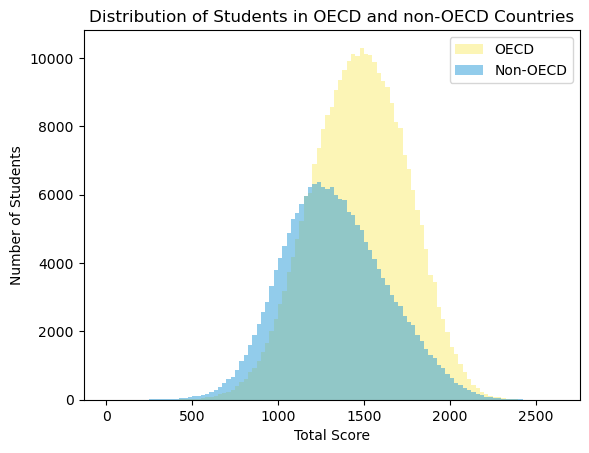

In [35]:
#dividing males and females into their own structure
OECD = df[df["OECD"]=="OECD"]
non_OECD = df[df["OECD"]=="Non-OECD"]
#bin size for plotting
binsize = 25
bins = np.arange(0, df["combined_score"].max(), binsize)
#plotting two hists over each other, one for OECD and the other for Non-OECD
plt.hist(data=OECD, x="combined_score", bins=bins, label="OECD", alpha=0.5, color="#fbec6f")
plt.hist(data=non_OECD, x="combined_score", bins=bins, label="Non-OECD", alpha=0.5, color="#279ad8")
#legend and x,y labels
plt.title("Distribution of Students in OECD and non-OECD Countries")
plt.legend()
plt.xlabel("Total Score")
plt.ylabel("Number of Students");

Non-OECD students scores look normally distributed and OECD students scores look slightly left skewed showing that OECD countries score higher on the chart.

In [36]:
diff = int(OECD["combined_score"].mean() - non_OECD["combined_score"].mean())
print("Difference in Total Scores between students in OECD and non-OECD countries: ", diff)

Difference in Total Scores between students in OECD and non-OECD countries:  144


In [49]:
o = OECD["combined_score"].mean()
n = non_OECD["combined_score"].mean()
diff = (o/n)*100-100
print("OECD Countries peformed {}% better than non-OECD countries".format(round(diff,2)))

OECD Countries peformed 10.88% better than non-OECD countries


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The data showed that female students on average scored 35 points better on the reading tests over male students. And it was also shown for total scores in the tests, that students in OECD countries scored 144 points higher than students in non-OECD countries

## Multivariate Exploration


### How do the math, science, and reading test scores correlate 

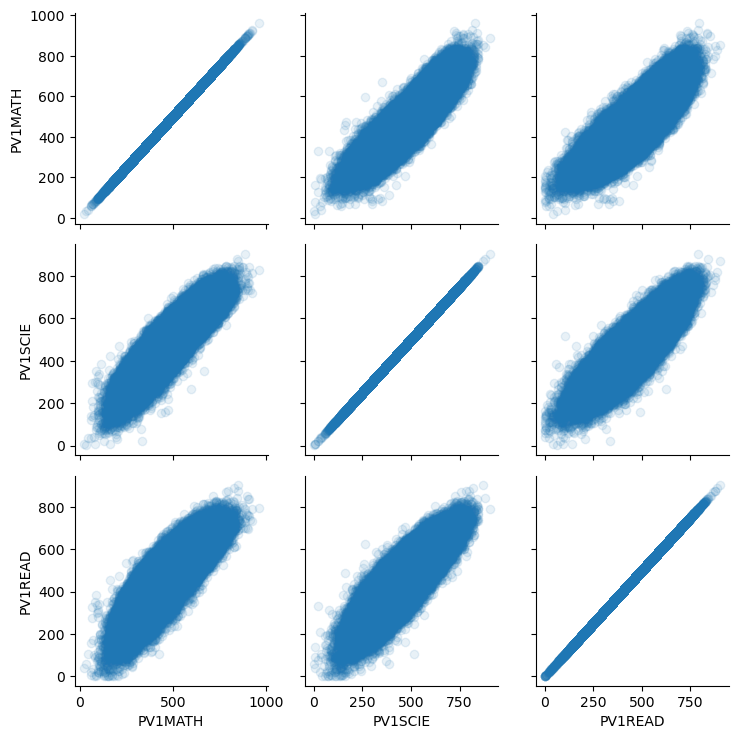

In [37]:
#creating grid
g = sns.PairGrid(data = df, vars = ["PV1MATH", "PV1SCIE", "PV1READ"])
#making the plot
g.map(plt.scatter, alpha=0.1);

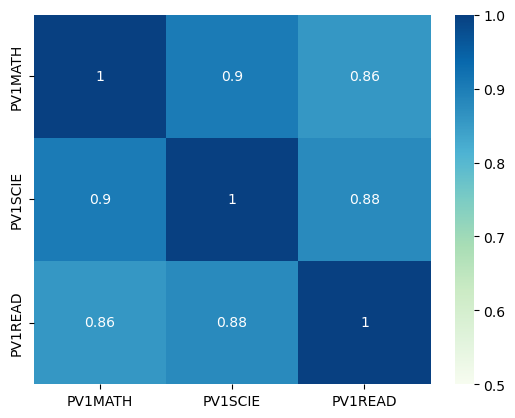

In [38]:
#creating correlation matrix
corr = df[["PV1MATH","PV1SCIE","PV1READ","ST29Q04"]].corr()
#creating heatmap
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap="GnBu",
            vmin=0.5);

The previous plots showed that the Math, Science and Reading scores are all highly correlated with each other. Math and Science having the highest correlation% at 90%, and the lowest correlation, while still high, is the Reading and Math at a correlation% of 86%

## Conclusions
After exploring the data, these were the results the were found:
1. Science had the highest average score of 475.8, followed by Reading with 472, and  Math with the lowest average of 469.6
1. Africa and the Middle East had the lowest participation for the PISA study
1. The students were almost equally split by gender, with 49.52% of the students being Male and the remaining 50.48% of the students female.
1. The majority of paricipating countries were part of the OECD (60.85%)
1. East Asian countries scored the best in the world. Singapore, South Korea, China and Japan were the top 4 scores on the globe.
1. Mexico and Italy had the highest number of students partipate in the exams
1. Female students on average scored 35 points better than male students on the reading test, but scored 11 points worse on the math test. Female and male students on average scored equally on the science test.
1. Students from OECD countries scored a total of 144 points more than students who are in non-OECD countries (10.88% better).
1. The test scores of math, science and reading were all highly correlated